In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
path="C:\\Users\\21548\\PycharmProjects\\phantichdulieu\\.venv\\khaithac\\data\\data.CSV"
df1=pd.read_csv(path)

# link data: https://www.kaggle.com/datasets/ksabishek/product-sales-data

In [2]:
df1.shape

(1041, 7)

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1041 non-null   object
 1   Q-P1      1041 non-null   int64 
 2   S-P2      1041 non-null   int64 
 3   Q-P2      1041 non-null   int64 
 4   Volume    1041 non-null   int64 
 5   Currency  1041 non-null   object
 6   TP        1041 non-null   object
dtypes: int64(4), object(3)
memory usage: 57.1+ KB


	Q-P1: Giá chưa sale
	S-P2: Gía sale
	Q-P2: Doanh Thu Đạt được


In [4]:
df1['Month'] = df1['Date'].str[3:5]
df1.head()

,Date,Q-P1,S-P2,Q-P2,Volume,Currency,TP,Month
0,20/04/2018,40150,40000,80150,4164231,VND,TP. Ho Chi Minh,04
1,23/04/2018,42300,41300,83600,1940924,VND,Ba Ria,04
2,24/04/2018,41850,41300,83150,2291985,VND,Vung Tau,04
3,26/04/2018,41900,41400,83300,1306023,VND,Thu Dau Mot,04
4,27/04/2018,41800,40800,82600,1656048,VND,Di An,04


In [5]:
print(set(df1['Month']))

{'6/', '1/', '10', '02', '01', '09', '11', '04', '12', '9/', '03', '05', '08', '07', '06'}


In [6]:
df1.shape

(1041, 8)

In [7]:
df1 = df1[df1['Month'] != '6/']
df1 = df1[df1['Month'] != '1/']
df1 = df1[df1['Month'] != '9/']

In [8]:
print(set(df1['Month']))

{'10', '02', '01', '09', '11', '04', '12', '03', '05', '08', '07', '06'}


In [9]:
df1.shape

(1038, 8)

In [10]:
df1.groupby('Month').sum()['Q-P2']

Month
01    3112950
02    2973338
03    3387955
04    2664252
05    3016513
06    2882505
07    3127620
08    3163480
09    3168997
10    3384386
11    3296683
12    3362976
Name: Q-P2, dtype: int64

In [11]:
sales_value = df1.groupby('Month').sum() ['Q-P2']
sales_value.max()

3387955

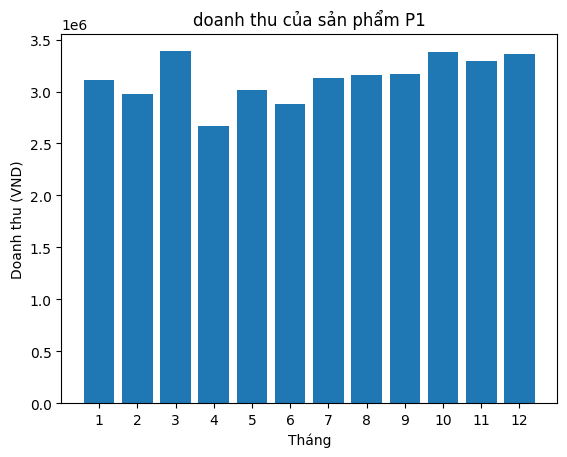

In [12]:
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.title("doanh thu của sản phẩm P1")
plt.xlabel('Tháng')
plt.ylabel('Doanh thu (VND)')
plt.show()

In [13]:
df1.head()

,Date,Q-P1,S-P2,Q-P2,Volume,Currency,TP,Month
0,20/04/2018,40150,40000,80150,4164231,VND,TP. Ho Chi Minh,04
1,23/04/2018,42300,41300,83600,1940924,VND,Ba Ria,04
2,24/04/2018,41850,41300,83150,2291985,VND,Vung Tau,04
3,26/04/2018,41900,41400,83300,1306023,VND,Thu Dau Mot,04
4,27/04/2018,41800,40800,82600,1656048,VND,Di An,04


In [14]:
df1.groupby('TP').sum()['Q-P2']

TP
Ba Ria             3379327
Bien Hoa           3394457
Binh Long          3396334
Di An              3518398
Dong Xoai          3415163
Long Khanh         3436070
TP. Ho Chi Minh    3439476
Tay Ninh           3258787
Thu Dau Mot        3448468
Thuan An           3452729
Vung Tau           3402446
Name: Q-P2, dtype: int64

In [15]:
sales_value_TP = df1.groupby('TP').sum() ['Q-P2']
sales_value_TP.max()

3518398

In [16]:
cities=df1['TP'].unique()

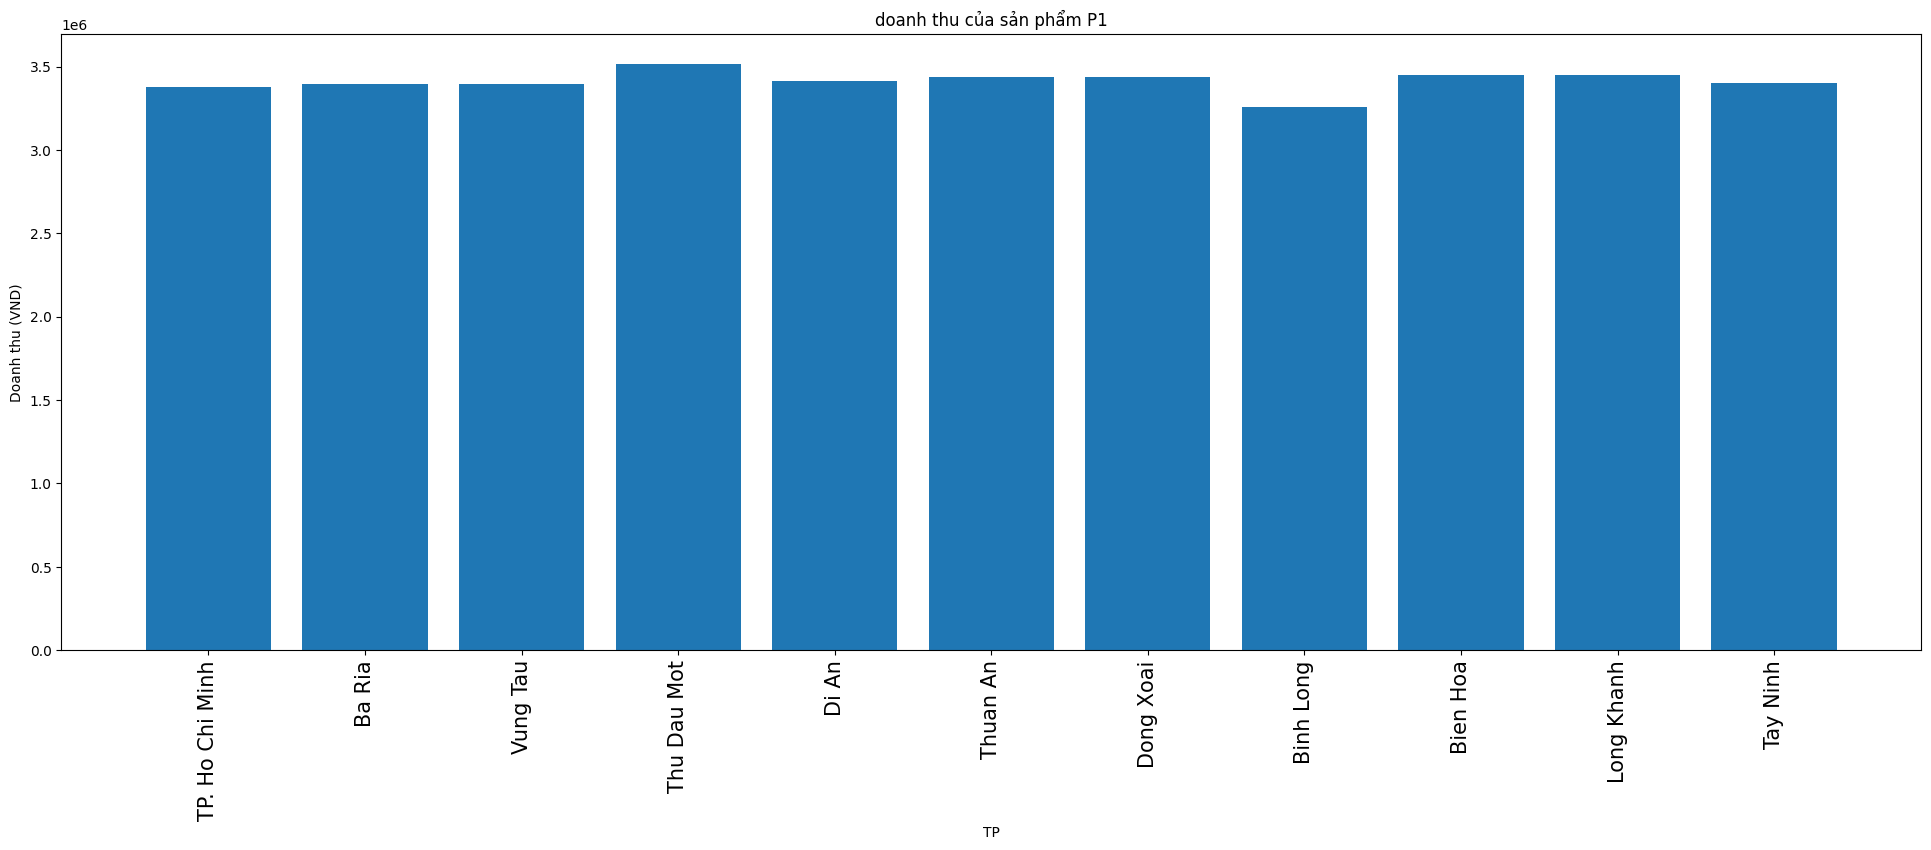

In [17]:
plt.figure(figsize=(24, 8))
plt.bar(x=cities, height=sales_value_TP)
plt.xticks(cities, rotation=90,fontsize=15)
plt.title("doanh thu của sản phẩm P1")
plt.xlabel('TP')
plt.ylabel('Doanh thu (VND)')
plt.show()